## This notebook measures performance improvements of mixed-precision FNO

In [26]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [27]:
import numpy as np
import matplotlib.pyplot as plt



In [38]:
def plot_memory_savings(memory_consumptions, labels, save_name=None):
    plt.figure(figsize=(12, 6))

    x = np.arange(len(memory_consumptions))
    colors = plt.cm.get_cmap('Set3', len(memory_consumptions))

    # Find the index of the slowest method
    largest_idx = np.argmax(memory_consumptions)
    largest_memory = memory_consumptions[largest_idx]

    # Calculate reduction percentage for each method
    reductions = [(largest_memory - t) / largest_memory * 100 for t in memory_consumptions]

    # Sort memory_consumptions and labels based on slowest to fastest
    memory_consumptions_sorted, labels_sorted, reductions_sorted = zip(*sorted(zip(memory_consumptions, labels, reductions), reverse=True))

    bars = plt.bar(x, memory_consumptions_sorted, color=colors(x))
    plt.xticks(x, labels_sorted, rotation='horizontal', fontsize=16)
    #plt.xlabel('Methods', fontsize=18)
    plt.ylabel('GPU Memory Consumption (MB)', fontsize=18)
    plt.title('Comparison of GPU Memory Consumption', fontsize=20)
    plt.grid(False)

    # Add text on top of each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{reductions_sorted[i]:.1f}%', ha='center', va='bottom', fontsize=16)

    plt.tight_layout()
    if save_name:
        plt.savefig(save_name, format='pdf')

    plt.show()

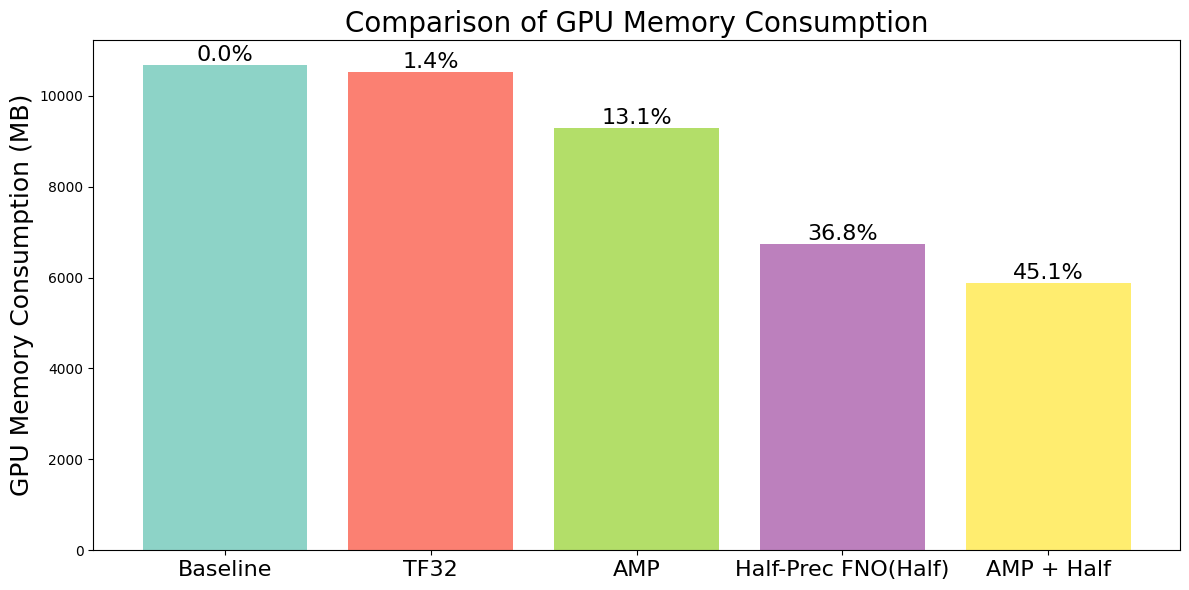

In [42]:

memory_usage = [10686, 10534, 9284, 6750, 5870]
labels = ['Baseline', 'TF32', 'AMP', 'Half-Prec FNO(Half)', 'AMP + Half']

plot_memory_savings(memory_usage, labels, save_name='memory_comparison.pdf')

In [49]:
def plot_throughput(throughputs, labels, save_name=None):
    plt.figure(figsize=(12, 6))

    x = np.arange(len(throughputs))
    colors = plt.cm.get_cmap('Set3', len(throughputs))

    # Find the index of the slowest method
    smallest_idx = np.argmin(throughputs)
    smallest_throughput = throughputs[smallest_idx]

    reductions = [(t - smallest_throughput) / smallest_throughput * 100 for t in throughputs]

    throughputs_sorted, labels_sorted, reductions_sorted = zip(*sorted(zip(throughputs, labels, reductions), reverse=False))

    bars = plt.bar(x, throughputs_sorted, color=colors(x))
    plt.xticks(x, labels_sorted, rotation='horizontal', fontsize=16)
    #plt.xlabel('Methods', fontsize=18)
    plt.ylabel('Training Throughput (samples/s)', fontsize=18)
    plt.title('Comparison of Training Throughput', fontsize=20)
    plt.grid(False)

    # Add text on top of each bar
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{reductions_sorted[i]:.1f}%', ha='center', va='bottom', fontsize=16)

    plt.tight_layout()
    if save_name:
        plt.savefig(save_name, format='pdf')

    plt.show()

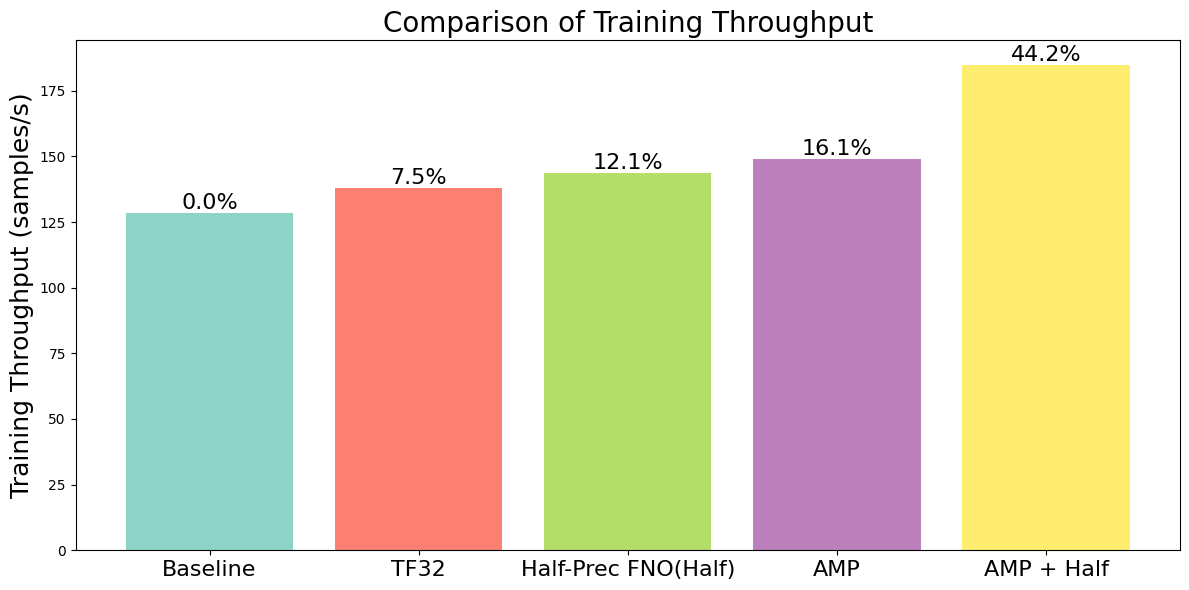

In [50]:

runtimes = [77.95, 72.52, 67.16, 69.55, 54.07]
throughputs = 10000 / np.array(runtimes)
labels = ['Baseline', 'TF32', 'AMP', 'Half-Prec FNO(Half)', 'AMP + Half']

plot_throughput(throughputs, labels, save_name='throughput_comparison.pdf')